In [245]:
import numpy as np
from sklearn.cluster import KMeans
from math import sqrt, ceil
import matplotlib.pyplot as plt

In [246]:
# Abrindo o conjunto de dados

data = np.loadtxt("KC2.txt", dtype='str', delimiter=',')


dataFalse = data[data[:, -1] == 'no', :]
dataFalseX1 = dataFalse[:ceil(len(dataFalse)*0.7),:-1]     # Padrões sem defeito (treinamento) 70%
dataFalseX1 = dataFalseX1.astype(np.float)
dataFalseX2 = dataFalse[ceil(len(dataFalse)*0.7):,:-1]     # Padrões sem defeito (teste) 30%
dataFalseX2 = dataFalseX2.astype(np.float)

dataTrue = data[data[:, -1] == 'yes', :]      # Padrões com defeito
dataTrueX = dataTrue[:,:-1]
dataTrueX = dataTrueX.astype(np.float)

In [247]:
falsePositives = []
truePositives = []
F1 = []

for centroids in range(3,41):                   # Repetir o modelo usando quantidade de centróides diferentes

    kmeans = KMeans(n_clusters=centroids)       # Criando o modelo k-means
    kmeans.fit(dataFalseX1)                     # Treinando usando os padrões sem defeito 70%

    kmeansLabels = kmeans.labels_               # Retorna a que agrupamento cada padrão pertence
    kmeansCenters = kmeans.cluster_centers_     # Retorna as posições de cada centróide
    kmeansRadius = []

    for i in range(centroids):             # Estabelecendo o raio de cada circunferência das regiões de cobertura
        maxDist = 0

        for j in range(len(dataFalseX1)):

            if(kmeansLabels[j] == i):       # Se o padrão em questão pertence ao agrupamento
                dist = 0 

                for k in range(dataFalseX1.shape[1]):          # Calcula a distância
                    dist += pow((kmeansCenters[i,k] - dataFalseX1[j,k]),2)
                dist = sqrt(dist)

                if(dist > maxDist):             # Se essa distância for a máxima
                    maxDist = dist
 
        kmeansRadius = np.append(kmeansRadius, maxDist)     # Guarda o raio referente àquela cobertura 

    fn = 0              # False negative
    tp = 0              # True positive
    tn = 0              # True negative
    fp = 0              # False positive

    for j in range(len(dataTrue)):             # Etapa de teste usando os padrões com defeito
        for i in range(centroids):
            dist = 0 

            for k in range(dataTrueX.shape[1]):              # Calcula a distância do padrão em relação ao centróide
                dist += pow((kmeansCenters[i,k] - dataTrueX[j,k]),2)    
            dist = sqrt(dist)

            if(dist <= kmeansRadius[i]):             # Se for menor que o raio, então o padrão é classificado sem defeito
                fn += 1
                break

            if(i == centroids-1):                  # Se não está dentro de nenhuma região de cobertura, então defeituoso
                tp += 1

    for j in range(len(dataFalseX2)):         # Etapa de teste usando os padrões sem defeito 30%
        for i in range(centroids):
            dist = 0 

            for k in range(dataFalseX2.shape[1]):
                dist += pow((kmeansCenters[i,k] - dataFalseX2[j,k]),2)    
            dist = sqrt(dist)

            if(dist <= kmeansRadius[i]):
                tn += 1
                break

            if(i == centroids-1):
                fp += 1
    
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f1 = 2*(precision*recall)/(precision+recall)
    
    F1 = np.append(F1, f1)
    falsePositives = np.append(falsePositives, fp)
    truePositives = np.append(truePositives, tp)

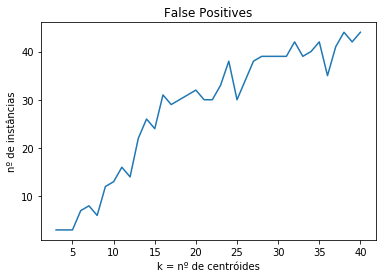

In [248]:
plt.plot(range(3,41),falsePositives)
plt.title('False Positives')
plt.xlabel('k = nº de centróides')
plt.ylabel('nº de instâncias')
plt.savefig('fpKC2.jpg')

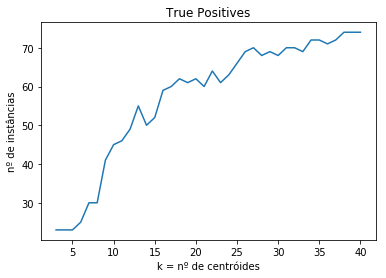

In [249]:
plt.plot(range(3,41),truePositives)
plt.title('True Positives')
plt.xlabel('k = nº de centróides')
plt.ylabel('nº de instâncias')
plt.savefig('tpKC2.jpg')

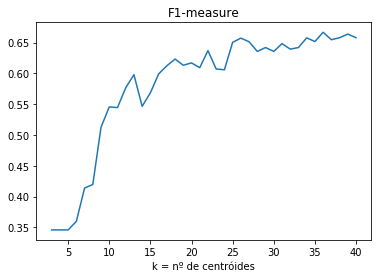

In [250]:
plt.plot(range(3,41),F1)
plt.title('F1-measure')
plt.xlabel('k = nº de centróides')
plt.savefig('f1KC2.jpg')